# Data Fetching

In [289]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [290]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [291]:
fetch_housing_data()


In [292]:
housing = load_housing_data()

In [293]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [294]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [295]:
housing.shape

(20640, 10)

In [296]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [297]:
housing['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [298]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


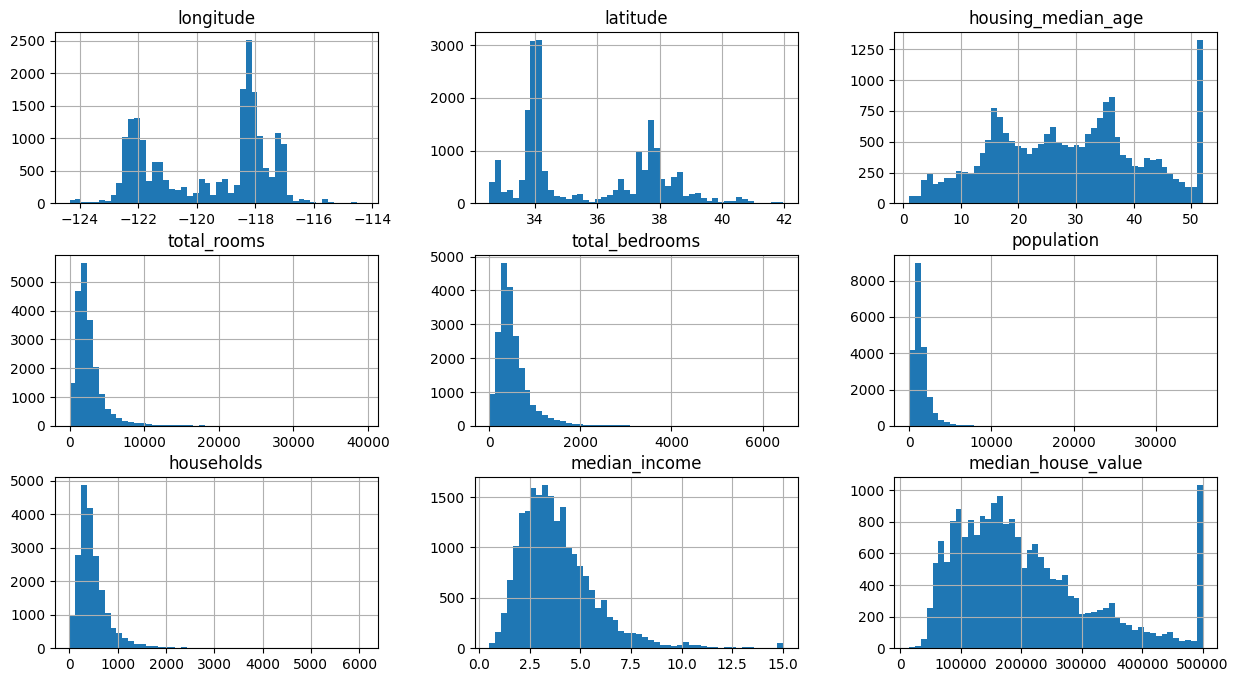

In [299]:
import matplotlib.pyplot as plt
housing.hist(bins = 50 , figsize = (15, 8))
plt.show()


<Axes: >

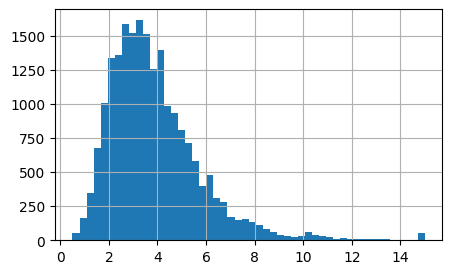

In [300]:
housing['median_income'].hist(bins = 50, figsize = (5,3))

In [301]:
len(housing)

20640

# Data Splitting

## Numpy Random

In [302]:
#splitting data manually
import numpy as np
def split_data(data,  test_ratio):
    test_value = int(len(data)*test_ratio/100)
    np.random.seed(63)
    shuffle = np.random.permutation(len(data))
    test_ind = shuffle[:test_value, ]
    train_ind = shuffle[test_value: , ]
    return test_ind, train_ind

In [303]:
test_ind, train_ind = split_data(housing, 20)

In [304]:
train_ind

array([ 1199,  7962,  4296, ...,   139, 11380,  5164])

In [305]:
train_df = housing.iloc[train_ind]

In [306]:
test_df = housing.iloc[test_ind]

In [307]:
len(train_ind), len( test_ind)

(16512, 4128)

## Hashing

In [308]:
#method2 to not let the model know any test data 
from zlib import crc32
def check(val, test_ratio):
    return crc32(np.int64(val)) < test_ratio*(2**32)

In [309]:
def send_to_check(data, test_ratio, col):
    ids = data[col]
    id_ind = ids.apply(lambda id : check(id, test_ratio))
    return data.loc[~id_ind], data.loc[id_ind]
     
                       
     
    

In [310]:
housing = housing.reset_index()
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [311]:
train_df2, test_df2 = send_to_check(housing, 0.2, 'index')

In [312]:
train_df2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [313]:
test_df2.shape

(4128, 11)

In [314]:
train_df2.shape

(16512, 11)

In [315]:
housing

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Stratified Sampling

In [316]:
# let us assume that median housing prices depend mostly upon median income, it is then required to do stratified sampling

In [317]:
housing['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [318]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

<Axes: >

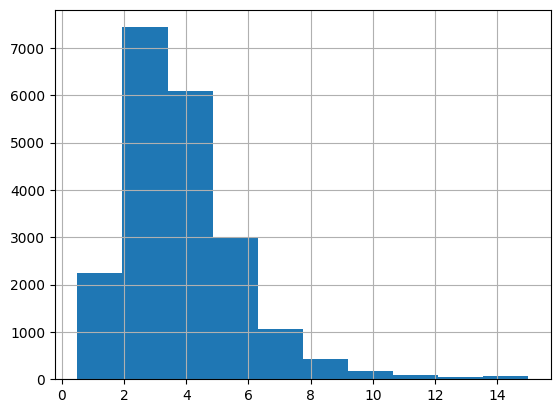

In [319]:
housing['median_income'].hist()

In [320]:
housing['income'] = pd.cut(housing['median_income'], bins = [0. , 1.5, 3. , 4.5, 6, 7.5, np.inf ], labels =[1, 2, 3, 4, 5, 6])

In [170]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [321]:
from sklearn.model_selection import StratifiedShuffleSplit
SSS = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 2)
for train_ind2, test_ind2  in SSS.split(housing, housing['income']):
    train_set = housing.loc[train_ind2]
    test_set = housing.loc[test_ind2]

In [322]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
16218,16218,-121.34,37.97,33.0,2493.0,454.0,1203.0,436.0,3.7650,94600.0,INLAND,3
10490,10490,-117.67,33.49,10.0,366.0,61.0,128.0,61.0,8.1630,250000.0,<1H OCEAN,6
16970,16970,-122.30,37.55,35.0,3675.0,735.0,1930.0,715.0,3.9833,342800.0,NEAR OCEAN,3
4198,4198,-118.24,34.12,29.0,2904.0,892.0,3320.0,765.0,2.6111,168800.0,<1H OCEAN,2
13316,13316,-117.62,34.07,16.0,6009.0,1599.0,5110.0,1389.0,2.5677,128900.0,INLAND,2


In [323]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
246,246,-122.21,37.78,47.0,881.0,248.0,753.0,241.0,2.6250,111300.0,NEAR BAY,2
9849,9849,-121.89,36.60,40.0,626.0,164.0,337.0,150.0,2.7917,225000.0,<1H OCEAN,2
11305,11305,-117.94,33.77,33.0,2964.0,747.0,2235.0,718.0,3.2591,175900.0,<1H OCEAN,3
3721,3721,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,290100.0,<1H OCEAN,3
18178,18178,-122.00,37.36,25.0,3534.0,949.0,1880.0,849.0,3.4238,337000.0,<1H OCEAN,3


In [324]:

train_set['income'].value_counts()/len(train_set)

income
3    0.350594
2    0.318859
4    0.176296
5    0.068920
6    0.045482
1    0.039850
Name: count, dtype: float64

In [325]:
housing['income'].value_counts()/len(housing)

income
3    0.350581
2    0.318847
4    0.176308
5    0.068944
6    0.045494
1    0.039826
Name: count, dtype: float64

In [326]:
test_set['income'].value_counts()/len(test_set)

income
3    0.350533
2    0.318798
4    0.176357
5    0.069041
6    0.045543
1    0.039729
Name: count, dtype: float64

# Data Visualization

In [327]:
train_copy = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

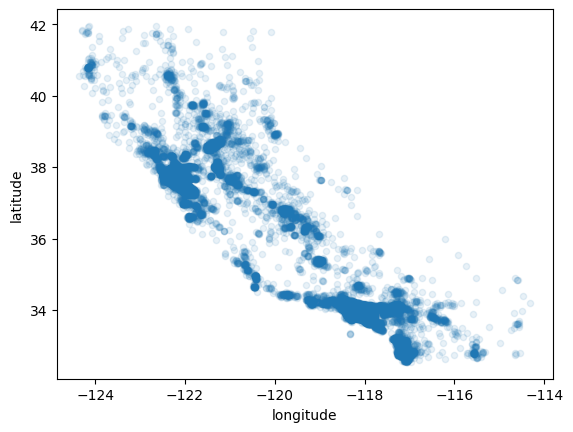

In [328]:
train_copy.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

In [329]:
# The above visualization tells us about the areas where there are more districts


<Axes: xlabel='longitude', ylabel='latitude'>

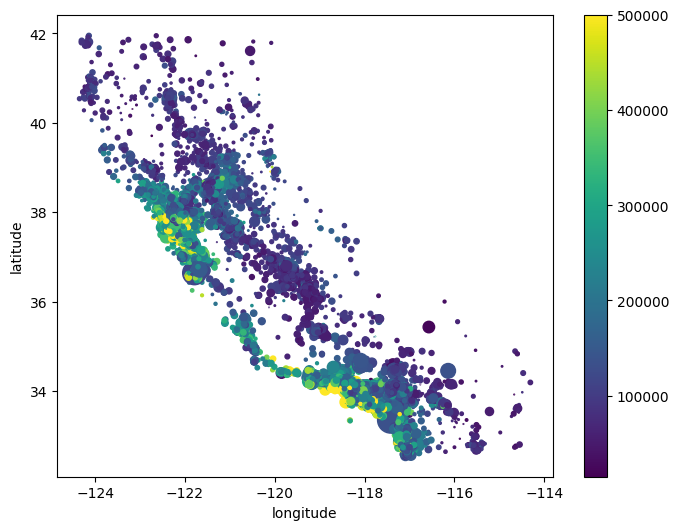

In [330]:
# Visulazing places where the median house value(color) is high , we can also look at the population(radius)
train_copy.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = train_copy['population']/100, c = train_copy['median_house_value'], cmap = plt.get_cmap(), colorbar = True, figsize = (8, 6))  


In [331]:
housing  = train_set.copy()

In [332]:
numerical_housing = housing.select_dtypes(include = 'float')
numerical_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16218,-121.34,37.97,33.0,2493.0,454.0,1203.0,436.0,3.7650,94600.0
10490,-117.67,33.49,10.0,366.0,61.0,128.0,61.0,8.1630,250000.0
16970,-122.30,37.55,35.0,3675.0,735.0,1930.0,715.0,3.9833,342800.0
4198,-118.24,34.12,29.0,2904.0,892.0,3320.0,765.0,2.6111,168800.0
13316,-117.62,34.07,16.0,6009.0,1599.0,5110.0,1389.0,2.5677,128900.0


In [333]:
corr_matrix = numerical_housing.corr()

In [334]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.686277
total_rooms           0.134848
housing_median_age    0.101024
households            0.067478
total_bedrooms        0.050480
population           -0.021591
longitude            -0.044078
latitude             -0.146411
Name: median_house_value, dtype: float64

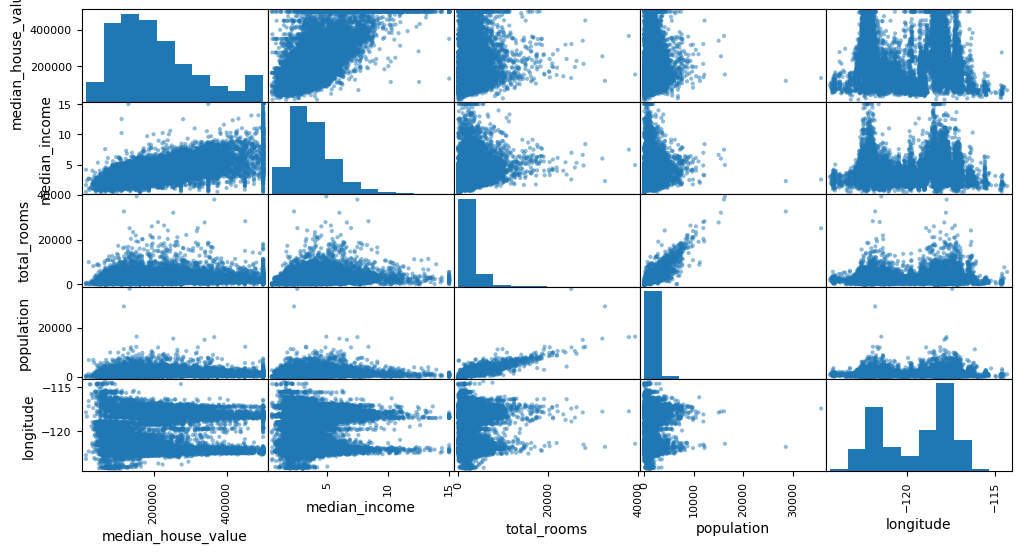

In [335]:
# visualizing correlation
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'population', 'longitude']
scatter_matrix(numerical_housing[attributes], figsize = (12, 6))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

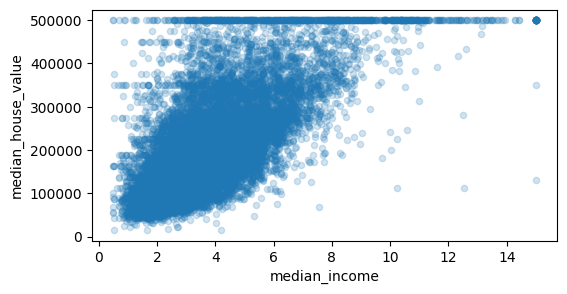

In [336]:
numerical_housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', figsize = (6, 3), alpha = 0.2)

In [337]:
# there is a straight line at 50k , this might make the model restrict the max price to be 50k, so it is better to remove

In [338]:
housing.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income'],
      dtype='object')

In [339]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16218 to 19954
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               16512 non-null  int64   
 1   longitude           16512 non-null  float64 
 2   latitude            16512 non-null  float64 
 3   housing_median_age  16512 non-null  float64 
 4   total_rooms         16512 non-null  float64 
 5   total_bedrooms      16353 non-null  float64 
 6   population          16512 non-null  float64 
 7   households          16512 non-null  float64 
 8   median_income       16512 non-null  float64 
 9   median_house_value  16512 non-null  float64 
 10  ocean_proximity     16512 non-null  object  
 11  income              16512 non-null  category
dtypes: category(1), float64(9), int64(1), object(1)
memory usage: 1.5+ MB


In [340]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_by_household'] = housing['population']/housing['households']


In [341]:
num2 = housing.select_dtypes('number')

In [342]:
corr_matrix = num2.corr()

In [343]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value         1.000000
median_income              0.686277
rooms_per_household        0.146225
total_rooms                0.134848
housing_median_age         0.101024
index                      0.073750
households                 0.067478
total_bedrooms             0.050480
population                -0.021591
population_by_household   -0.037212
longitude                 -0.044078
latitude                  -0.146411
bedrooms_per_room         -0.252206
Name: median_house_value, dtype: float64

In [348]:
housing = train_set.drop(['median_house_value'], axis = 1).copy()
housing_labels = train_set['median_house_value'].copy()

In [350]:
housing_labels

16218     94600.0
10490    250000.0
16970    342800.0
4198     168800.0
13316    128900.0
           ...   
3016     128300.0
2996      92700.0
7848     350000.0
42       118800.0
19954     67000.0
Name: median_house_value, Length: 16512, dtype: float64

In [351]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16218 to 19954
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               16512 non-null  int64   
 1   longitude           16512 non-null  float64 
 2   latitude            16512 non-null  float64 
 3   housing_median_age  16512 non-null  float64 
 4   total_rooms         16512 non-null  float64 
 5   total_bedrooms      16353 non-null  float64 
 6   population          16512 non-null  float64 
 7   households          16512 non-null  float64 
 8   median_income       16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income              16512 non-null  category
dtypes: category(1), float64(8), int64(1), object(1)
memory usage: 1.4+ MB


# Filling Missing Values

In [355]:
# total bedrooms have missing values
#remove rows ->housing.dropna(['total_bedrooms'])
# remove whole column -> new = housing.drop(['total_bedrooms'], axis = 1)
# Performing measures like mean , median , mode and filling with them

In [356]:
# Using numpy
# med = housing['total_bedrooms'].median()
#housing['total_bedrooms'].fillna(med, inplace = True)

In [381]:
#using scikit

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
num_housing = housing.drop(['ocean_proximity', 'income', 'index'], axis = 1)
imputer.fit(num_housing)

SimpleImputer(strategy='median')

In [383]:
num_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16218 to 19954
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16353 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [384]:

print(num_housing.median().values)

[-118.51     34.26     29.     2116.      432.     1164.      407.
    3.5377]


In [385]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2116.    ,  432.    , 1164.    ,
        407.    ,    3.5377])

In [386]:
num_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16218,-121.3400,37.9700,33.0000,2493.0000,454.0000,1203.0000,436.0000,3.7650
10490,-117.6700,33.4900,10.0000,366.0000,61.0000,128.0000,61.0000,8.1630
16970,-122.3000,37.5500,35.0000,3675.0000,735.0000,1930.0000,715.0000,3.9833
4198,-118.2400,34.1200,29.0000,2904.0000,892.0000,3320.0000,765.0000,2.6111
13316,-117.6200,34.0700,16.0000,6009.0000,1599.0000,5110.0000,1389.0000,2.5677
...,...,...,...,...,...,...,...,...
3016,-118.9300,34.8200,8.0000,508.0000,111.0000,229.0000,84.0000,4.0332
2996,-119.0400,35.3100,11.0000,2161.0000,371.0000,1267.0000,388.0000,4.1957
7848,-118.1700,33.8900,52.0000,63.0000,12.0000,47.0000,8.0000,7.2423
42,-122.2600,37.8400,49.0000,713.0000,202.0000,462.0000,189.0000,1.0250


In [387]:
X = imputer.transform(num_housing)

In [389]:
X

array([[-1.2134e+02,  3.7970e+01,  3.3000e+01, ...,  1.2030e+03,
         4.3600e+02,  3.7650e+00],
       [-1.1767e+02,  3.3490e+01,  1.0000e+01, ...,  1.2800e+02,
         6.1000e+01,  8.1630e+00],
       [-1.2230e+02,  3.7550e+01,  3.5000e+01, ...,  1.9300e+03,
         7.1500e+02,  3.9833e+00],
       ...,
       [-1.1817e+02,  3.3890e+01,  5.2000e+01, ...,  4.7000e+01,
         8.0000e+00,  7.2423e+00],
       [-1.2226e+02,  3.7840e+01,  4.9000e+01, ...,  4.6200e+02,
         1.8900e+02,  1.0250e+00],
       [-1.1933e+02,  3.6210e+01,  3.8000e+01, ...,  1.2380e+03,
         6.0600e+02,  2.6083e+00]])

In [390]:
new_df = pd.DataFrame(X, columns = num_housing.columns)

In [391]:
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.3400,37.9700,33.0000,2493.0000,454.0000,1203.0000,436.0000,3.7650
1,-117.6700,33.4900,10.0000,366.0000,61.0000,128.0000,61.0000,8.1630
2,-122.3000,37.5500,35.0000,3675.0000,735.0000,1930.0000,715.0000,3.9833
3,-118.2400,34.1200,29.0000,2904.0000,892.0000,3320.0000,765.0000,2.6111
4,-117.6200,34.0700,16.0000,6009.0000,1599.0000,5110.0000,1389.0000,2.5677
...,...,...,...,...,...,...,...,...
16507,-118.9300,34.8200,8.0000,508.0000,111.0000,229.0000,84.0000,4.0332
16508,-119.0400,35.3100,11.0000,2161.0000,371.0000,1267.0000,388.0000,4.1957
16509,-118.1700,33.8900,52.0000,63.0000,12.0000,47.0000,8.0000,7.2423
16510,-122.2600,37.8400,49.0000,713.0000,202.0000,462.0000,189.0000,1.0250


In [392]:
housing

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income
16218,16218,-121.3400,37.9700,33.0000,2493.0000,454.0000,1203.0000,436.0000,3.7650,INLAND,3
10490,10490,-117.6700,33.4900,10.0000,366.0000,61.0000,128.0000,61.0000,8.1630,<1H OCEAN,6
16970,16970,-122.3000,37.5500,35.0000,3675.0000,735.0000,1930.0000,715.0000,3.9833,NEAR OCEAN,3
4198,4198,-118.2400,34.1200,29.0000,2904.0000,892.0000,3320.0000,765.0000,2.6111,<1H OCEAN,2
13316,13316,-117.6200,34.0700,16.0000,6009.0000,1599.0000,5110.0000,1389.0000,2.5677,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
3016,3016,-118.9300,34.8200,8.0000,508.0000,111.0000,229.0000,84.0000,4.0332,INLAND,3
2996,2996,-119.0400,35.3100,11.0000,2161.0000,371.0000,1267.0000,388.0000,4.1957,INLAND,3
7848,7848,-118.1700,33.8900,52.0000,63.0000,12.0000,47.0000,8.0000,7.2423,<1H OCEAN,5
42,42,-122.2600,37.8400,49.0000,713.0000,202.0000,462.0000,189.0000,1.0250,NEAR BAY,1


# Categorical Encoding

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
# OE = OrdinalEncoder()
#  one_hot_encoded = OE.fit_transform(housing[])

In [396]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
new = housing[['ocean_proximity']]
new = OE.fit_transform(new)

In [401]:
new[:5, :]

array([[1.],
       [0.],
       [4.],
       [0.],
       [1.]])

In [402]:
OE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [406]:
for i, x in enumerate(OE.categories_[0]):
    print(i, x)

0 <1H OCEAN
1 INLAND
2 ISLAND
3 NEAR BAY
4 NEAR OCEAN


In [407]:
#But category 0 and 4 are similar , so use one hot encoidng

In [411]:
from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder()
new2 = OH.fit_transform(housing[['ocean_proximity']])


In [412]:
OH.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [413]:
new2

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [418]:
new2.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [420]:
housing[['ocean_proximity']]

,ocean_proximity
16218,INLAND
10490,<1H OCEAN
16970,NEAR OCEAN
4198,<1H OCEAN
13316,INLAND
...,...
3016,INLAND
2996,INLAND
7848,<1H OCEAN
42,NEAR BAY


In [421]:
# OneHotENCODING PRODUCES SPARSE MATRIX , SO IT IS NOT ADVISABLE FOR LARGE DATASETS

# Feature Scaling

In [424]:
housing.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16353.0000,16512.0000,16512.0000,16512.0000
mean,10294.9805,-119.5818,35.6456,28.6745,2623.0557,535.2419,1419.2639,496.2670,3.8700
std,5971.5850,2.0063,2.1406,12.6092,2170.2793,418.4802,1134.3895,379.5003,1.8969
min,0.0000,-124.3500,32.5500,1.0000,2.0000,2.0000,3.0000,2.0000,0.4999
25%,5099.7500,-121.8000,33.9300,18.0000,1445.0000,295.0000,785.0000,279.0000,2.5625
50%,10254.5000,-118.5100,34.2600,29.0000,2116.0000,432.0000,1164.0000,407.0000,3.5377
75%,15489.2500,-118.0200,37.7200,37.0000,3124.5000,644.0000,1714.0000,601.0000,4.7447
max,20639.0000,-114.3100,41.9500,52.0000,39320.0000,6445.0000,35682.0000,6082.0000,15.0001


In [425]:
# we should scale total rooms,median_income so on since the data varies by alot
#minmax by default scales from 0 to 1, we can use parameter featurerange , if we want to decide the range
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
scale1 = MMS.fit_transform(housing[['median_income', 'total_rooms']])



In [427]:
scale1.shape

(16512, 2)

In [430]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scale2 = SS.fit_transform(housing[['median_income', 'total_rooms']])

In [431]:
scale2

array([[-0.05535435, -0.05992761],
       [ 2.26326345, -1.04001549],
       [ 0.05973302,  0.48471925],
       ...,
       [ 1.77787204, -1.17963308],
       [-1.49987749, -0.88012339],
       [-0.66516454,  0.22668013]])

In [432]:
#standardizations makes the values with mean 0 and std 1 

# Using Pipelines to do all of the above

In [433]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16218 to 19954
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               16512 non-null  int64   
 1   longitude           16512 non-null  float64 
 2   latitude            16512 non-null  float64 
 3   housing_median_age  16512 non-null  float64 
 4   total_rooms         16512 non-null  float64 
 5   total_bedrooms      16353 non-null  float64 
 6   population          16512 non-null  float64 
 7   households          16512 non-null  float64 
 8   median_income       16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income              16512 non-null  category
dtypes: category(1), float64(8), int64(1), object(1)
memory usage: 1.9+ MB


In [442]:
housing.drop('income', axis = 1, inplace = True)

In [465]:
housing.drop('index', axis = 1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16218,-121.3400,37.9700,33.0000,2493.0000,454.0000,1203.0000,436.0000,3.7650,INLAND
10490,-117.6700,33.4900,10.0000,366.0000,61.0000,128.0000,61.0000,8.1630,<1H OCEAN
16970,-122.3000,37.5500,35.0000,3675.0000,735.0000,1930.0000,715.0000,3.9833,NEAR OCEAN
4198,-118.2400,34.1200,29.0000,2904.0000,892.0000,3320.0000,765.0000,2.6111,<1H OCEAN
13316,-117.6200,34.0700,16.0000,6009.0000,1599.0000,5110.0000,1389.0000,2.5677,INLAND
...,...,...,...,...,...,...,...,...,...
3016,-118.9300,34.8200,8.0000,508.0000,111.0000,229.0000,84.0000,4.0332,INLAND
2996,-119.0400,35.3100,11.0000,2161.0000,371.0000,1267.0000,388.0000,4.1957,INLAND
7848,-118.1700,33.8900,52.0000,63.0000,12.0000,47.0000,8.0000,7.2423,<1H OCEAN
42,-122.2600,37.8400,49.0000,713.0000,202.0000,462.0000,189.0000,1.0250,NEAR BAY


In [472]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'mean' )), ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('encoder', OneHotEncoder())])

In [495]:
from sklearn.compose import ColumnTransformer
num_attr = list(num_housing)
cat_attr = ['ocean_proximity']
all_pipelines = ColumnTransformer([('num_pipe', num_pipeline, num_attr), ('cat_pipe', cat_pipeline, cat_attr)])

In [496]:
housing_prepared = all_pipelines.fit_transform(housing)

In [497]:
housing_prepared

array([[-0.8763745 ,  1.08590653,  0.34305419, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.9529029 , -1.00704446, -1.48106057, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35487758,  0.88969238,  0.50167287, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.70368255, -0.82017384,  1.84993161, ...,  0.        ,
         0.        ,  0.        ],
       [-1.33493996,  1.02517358,  1.61200359, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12549132,  0.26367579,  0.73960088, ...,  0.        ,
         0.        ,  0.        ]])

In [511]:
housing_lables = housing_labels.values

In [538]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [537]:
housing_labels

16218    94600.0000
10490   250000.0000
16970   342800.0000
4198    168800.0000
13316   128900.0000
            ...    
3016    128300.0000
2996     92700.0000
7848    350000.0000
42      118800.0000
19954    67000.0000
Name: median_house_value, Length: 16512, dtype: float64

In [539]:
regressor.fit(housing_prepared, housing_lables)

LinearRegression()

In [519]:
test_set = test_set.drop(['income', 'index'], axis = 1)

In [520]:
test_set.shape

(4128, 10)

In [527]:
test_set_labels = test_set[['median_house_value']].copy()
test_set_features = test_set.drop('median_house_value', axis = 1).copy()

In [528]:
test_set_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
246,-122.2100,37.7800,47.0000,881.0000,248.0000,753.0000,241.0000,2.6250,NEAR BAY
9849,-121.8900,36.6000,40.0000,626.0000,164.0000,337.0000,150.0000,2.7917,<1H OCEAN
11305,-117.9400,33.7700,33.0000,2964.0000,747.0000,2235.0000,718.0000,3.2591,<1H OCEAN
3721,-118.4300,34.2000,28.0000,3386.0000,NaN,2240.0000,737.0000,3.0221,<1H OCEAN
18178,-122.0000,37.3600,25.0000,3534.0000,949.0000,1880.0000,849.0000,3.4238,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
18618,-122.0300,37.0300,21.0000,4650.0000,733.0000,2014.0000,704.0000,5.6233,NEAR OCEAN
12367,-116.4300,33.8100,8.0000,6710.0000,1343.0000,2069.0000,781.0000,3.5223,INLAND
14582,-117.1800,32.8400,31.0000,3064.0000,575.0000,1476.0000,549.0000,3.6667,NEAR OCEAN
14497,-117.2300,32.8700,15.0000,2290.0000,662.0000,1034.0000,594.0000,3.0104,NEAR OCEAN


In [529]:
test_set_prepared = all_pipelines.transform(test_set_features)

In [534]:
test_set_lbs = test_set_labels.values

In [557]:
y_pred = regressor.predict(test_set_prepared)

In [545]:
housing_lables.shape

(16512,)

In [544]:
test_set_prepared.shape

(4128, 13)

In [546]:
test_set_lbs.shape

(4128, 1)

In [547]:
housing_lables

array([ 94600., 250000., 342800., ..., 350000., 118800.,  67000.])

In [553]:
test_lables = test_set_lbs.ravel()

In [561]:
test_lables

array([111300., 225000., 175900., ..., 175900., 204200.,  79100.])

In [560]:
np.concatenate((y_pred[:, np.newaxis], test_lables[:, np.newaxis]), axis = 1)

array([[195739.01554412, 111300.        ],
       [222631.19866314, 225000.        ],
       [202974.88639377, 175900.        ],
       ...,
       [227289.0180102 , 175900.        ],
       [217337.81932217, 204200.        ],
       [108817.32063363,  79100.        ]])

In [564]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_lables,y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


67757.47916950691